In [7]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import json
import time

In [26]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (8,5)

In [9]:
def read_as_json(file_name):
    with open(file_name) as json_file:
        data = json.load(json_file)
    return data

In [10]:
movies = pd.read_csv('ml-latest-small/movies.csv', low_memory=False)
ratings = pd.read_csv('ml-latest-small/ratings.csv', low_memory=False, names=['userId', 'movieId', 'rating','timestamp'])
ratings = ratings.drop(columns=['timestamp'])

In [11]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
print(len(ratings))
ratings.head()

100836


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [13]:
v1 = read_as_json('01.json')
v2 = read_as_json('02.json')
v3 = read_as_json('03.json')
v4 = read_as_json('04.json')
v5 = read_as_json('05.json')
v6 = read_as_json('06.json')
v7 = read_as_json('07.json')
v8 = read_as_json('08.json')
v9 = read_as_json('09.json')
v10 = read_as_json('10.json')

print("Tamanhos: {}, {}, {}, {}, {}, {}, {}, {}, {} e {}".format(len(v1),len(v2),len(v3),len(v4),len(v5),len(v6),len(v7),len(v8),len(v9),len(v10)))

Tamanhos: 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000 e 742


In [14]:
total = v1 + v2 + v3 + v4 + v5 + v6 + v7 + v8 + v9 + v10 
print(len(total))

9742


In [15]:
"""
Calculando a média, mediana e moda de cada filmes e adicionando esse valores no dicionário da variável total
"""
count=0

for item in total:
    if len(item['ratings']) < 1:
        my_mean = 'NO MEAN'
        my_median = 'NO MEDIAN'
        my_mode = 'NO MODE'
        my_desvio = 'NO DESVIO'
    else:
        my_aux = pd.Series(item['ratings'])
        my_mean = my_aux.mean()
        my_median = my_aux.median()
        my_mode = my_aux.mode()
        my_desvio = my_aux.std()
        
#         my_mode = statistics.mode(item['ratings'])
    
    item['mean'] = my_mean
    item['median'] = my_median
    item['mode'] = my_mode[0]
    item['desvio'] = my_desvio

In [16]:
print(total[41])

{'movieId': 45, 'ratings': [3.0, 3.0, 3.5, 4.0, 3.0, 2.5, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 2.0, 2.0, 4.5, 3.0, 3.0, 2.5, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.5, 5.0, 5.0, 2.5, 5.0, 4.0], 'counter': 32, 'acc': 106.0, 'mean': 3.3125, 'median': 3.0, 'mode': 3.0, 'desvio': 0.8303710791159926}


In [17]:
with open('all.json', 'w') as json_file:  
    json.dump(total, json_file)

In [18]:
"""
Serão definidos 5 Grupos de filmes, tal que:

    G1, filmes bastante avaliados, tq, ratings(G1) > 100
    G2, filmes muito avaliados, tq, 100 >= ratings(G2) > 50
    G3, filmes razoavelmente avaliados, tq, 50 >= ratings(G3) > 20
    G4, filmes pouco avaliados, tq, 20 >= ratings(G4) > 5
    G5, filmes pouqíssimo avaliados, tq, 5 >= ratings(G5)
"""

G1 = []
G2 = []
G3 = []
G4 = []
G5 = []

for item in total:
    if item['counter'] > 100:
        G1.append(item)
    elif 100 >= item['counter'] > 50:
        G2.append(item)
    elif 50 >= item['counter'] > 20:
        G3.append(item)
    elif 20 >= item['counter'] > 5:
        G4.append(item)
    else:
        G5.append(item)

In [19]:
print("Tamanho dos grupos: G1={}, G2={}, G3={}, G4={} e G5={}".format(len(G1), len(G2), len(G3), len(G4), len(G5)))

Tamanho dos grupos: G1=134, G2=302, G3=799, G4=2033 e G5=6474


In [20]:
data_G1 = []
data_G2 = []
data_G3 = []
data_G4 = []
data_G5 = []

for item in G1:
    data_G1 += item['ratings']
    
for item in G2:
    data_G2 += item['ratings']
    
for item in G3:
    data_G3 += item['ratings']
    
for item in G4:
    data_G4 += item['ratings']
    
for item in G5:
    data_G5 += item['ratings']
    
print("Tamanho data_G1={}, data_G2={}, data_G3={}, data_G4={}, data_G5={} e TOTAL={}".format(len(data_G1), len(data_G2), 
                                                                                        len(data_G3), len(data_G4), 
                                                                                        len(data_G5), 
                                                                   len(data_G1)+len(data_G2)+len(data_G3)+len(data_G4)+len(data_G5) ))

# print(G1[3])

Tamanho data_G1=19788, data_G2=20872, data_G3=25998, data_G4=21706, data_G5=12472 e TOTAL=100836


[134, 302, 799, 2033, 6474]


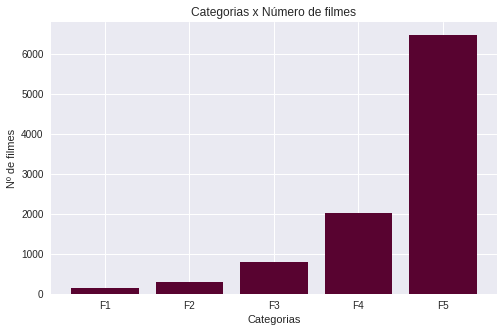

<Figure size 576x360 with 0 Axes>

In [27]:
categorias = ['F1', 'F2', 'F3', 'F4', 'F5']
filmes = [len(G1), len(G2), len(G3), len(G4), len(G5)]

print(filmes)

plt.bar(categorias, filmes, color='#580330')
plt.xticks(categorias)
plt.ylabel('Nº de filmes')
plt.xlabel('Categorias')
plt.title('Categorias x Número de filmes')

plt.show()
plt.savefig(fname='categ_vs_movies.png', format='png')

[19788, 20872, 25998, 21706, 12472]


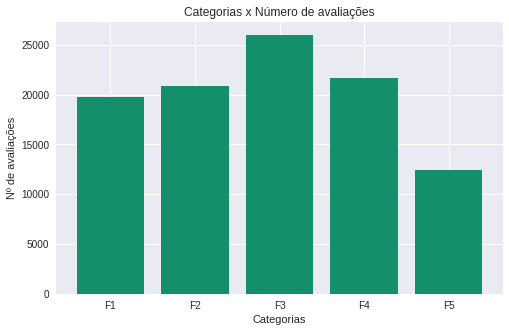

In [28]:
categorias = ['F1', 'F2', 'F3', 'F4', 'F5']
avaliacoes = [len(data_G1), len(data_G2), len(data_G3), len(data_G4), len(data_G5)]

print(avaliacoes)

plt.bar(categorias, avaliacoes, color='#138F6A')
plt.xticks(categorias)
plt.ylabel('Nº de avaliações')
plt.xlabel('Categorias')
plt.title('Categorias x Número de avaliações')

plt.show()

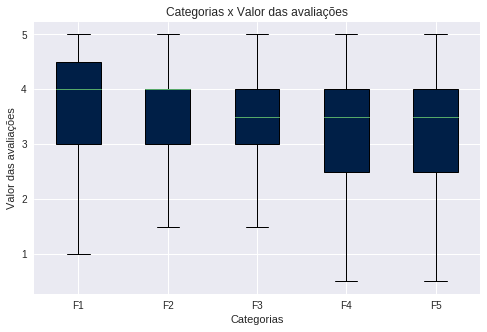

In [56]:
box_plot_data=[data_G1, data_G2, data_G3, data_G4, data_G5]

fig1, ax1 = plt.subplots()
ax1.set_title('Categorias x Valor das avaliações')
ax1.set_xlabel('Categorias')
ax1.set_ylabel('Valor das avaliações')
box = ax1.boxplot(box_plot_data,patch_artist=True,labels=['F1','F2','F3','F4','F5'])

colors = ['#001f47', '#001f47', '#001f47', '#001f47', '#001f47']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    

plt.show()